# Building a cancer cell state sankey with holoviews
#### Erik Burlingame
#### January 23, 2020

The dataframe `sk_df` is cell-by-marker and describes the state of each cancer cell from a breast cancer TMA as measured by cycIF and defined by manual intensity thresholding. Note that `sk_df` contains data for cancer cells only and is sourced from a master dataframe `thresh` which contained the states of all cells in the TMA. Cancer cells were defined using the following scheme:

```
sk_df = thresh[
    (
    (thresh['CK19_Ring']==True) | 
    (thresh['CK14_Ring']==True) | 
    (thresh['CK7_Ring']==True) | 
    (thresh['CK5_Ring']==True) |
    (thresh['Ecad_Ring']==True) |
    (thresh['ER_Nuclei']==True)) & 
    (thresh['CD45_Ring']==False) &
    (thresh['CD31_Ring']==False) &
    (thresh['CD68_Ring']==False)
    )
]
```

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
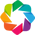

In [1]:
import holoviews as hv
from holoviews import dim

import pandas as pd
from itertools import product

hv.extension('bokeh')

In [2]:
sk_df = pd.read_csv('sk_df.csv')

In [3]:
stains = ['CK19','CK7','CK5','CK14','CD44','Vim']
stain_states = [[f'{s}+',f'{s}-'] for s in stains]
    
layer1=[['cancer cells', 
  stains[0:1][0] + list(product(['+','-'],repeat=1))[i][0], 
 len(sk_df[sk_df.CK19_Ring==list(product([True,False],repeat=1))[i][0]])] for i in range(2)]

bool_states = list(product([True,False],repeat=2))
layer2 = [list(item) + [len(sk_df[(sk_df.CK19_Ring==bool_states[idx][0]) & 
                                  (sk_df.CK7_Ring==bool_states[idx][1])])]
 for idx, item in 
enumerate(
    [i for i in list(
        product(
            ['/'.join(j) for j in list(product(*stain_states[0:1]))],
            ['/'.join(j) for j in list(product(*stain_states[0:2]))]
        )
    ) if i[0] in i[1]]
)]

bool_states = list(product([True,False],repeat=3))
layer3 = [list(item) + [len(sk_df[(sk_df.CK19_Ring==bool_states[idx][0]) & 
                                  (sk_df.CK7_Ring==bool_states[idx][1]) & 
                                  (sk_df.CK5_Ring==bool_states[idx][2])])]
 for idx, item in 
enumerate(
    [i for i in list(
        product(
            ['/'.join(j) for j in list(product(*stain_states[0:2]))],
            ['/'.join(j) for j in list(product(*stain_states[0:3]))]
        )
    ) if i[0] in i[1]]
)]
    
bool_states = list(product([True,False],repeat=4))
layer4 = [list(item) + [len(sk_df[(sk_df.CK19_Ring==bool_states[idx][0]) & 
                                  (sk_df.CK7_Ring==bool_states[idx][1]) & 
                                  (sk_df.CK5_Ring==bool_states[idx][2]) &
                                  (sk_df.CK14_Ring==bool_states[idx][3])])]
 for idx, item in 
enumerate(
    [i for i in list(
        product(
            ['/'.join(j) for j in list(product(*stain_states[0:3]))],
            ['/'.join(j) for j in list(product(*stain_states[0:4]))]
        )
    ) if i[0] in i[1]]
)]


bool_states = list(product([True,False],repeat=5))
layer5 = [list(item) + [len(sk_df[(sk_df.CK19_Ring==bool_states[idx][0]) & 
                                  (sk_df.CK7_Ring==bool_states[idx][1]) & 
                                  (sk_df.CK5_Ring==bool_states[idx][2]) &
                                  (sk_df.CK14_Ring==bool_states[idx][3]) &
                                  (sk_df.CD44_Ring==bool_states[idx][4])])]
 for idx, item in 
enumerate(
    [i for i in list(
        product(
            ['/'.join(j) for j in list(product(*stain_states[0:4]))],
            ['/'.join(j) for j in list(product(*stain_states[0:5]))]
        )
    ) if i[0] in i[1]]
)]

bool_states = list(product([True,False],repeat=6))
layer6 = [list(item) + [len(sk_df[(sk_df.CK19_Ring==bool_states[idx][0]) & 
                                  (sk_df.CK7_Ring==bool_states[idx][1]) & 
                                  (sk_df.CK5_Ring==bool_states[idx][2]) &
                                  (sk_df.CK14_Ring==bool_states[idx][3]) &
                                  (sk_df.CD44_Ring==bool_states[idx][4]) &
                                  (sk_df.Vim_Ring==bool_states[idx][5])])]
 for idx, item in 
enumerate(
    [i for i in list(
        product(
            ['/'.join(j) for j in list(product(*stain_states[0:5]))],
            ['/'.join(j) for j in list(product(*stain_states[0:6]))]
        )
    ) if i[0] in i[1]]
)]

In [4]:
all_layers = layer1+layer2+layer3+layer4+layer5+layer6

sankey = hv.Sankey(all_layers,
                   ['From', 'To'], 
                   vdims=hv.Dimension('Count', unit='cells')
                  ).opts(
    label_text_font_size='5pt',
    edge_color=dim('From').str(), 
    node_color=dim('index').str(),
    title='TN cores from BR1201a-SG48',
    node_padding=2,
    height = 2000,
    width=1400
)

In [5]:
sankey

:Sankey   [From,To]   (Count)